In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random


%matplotlib inline

In [6]:
# doc du lieu 
df = pd.read_csv('./data/danso_vietname_1995_2018.csv', index_col=' Địa Phương')

In [29]:
def to_float(s):
    try:
        return float(s)
    except: 
        return 0.0

In [37]:
# chuyen du lieu dan so ve kieu so (float)
# cac du lieu trong (null) duoc tinh = 0
df = df.applymap(to_float)

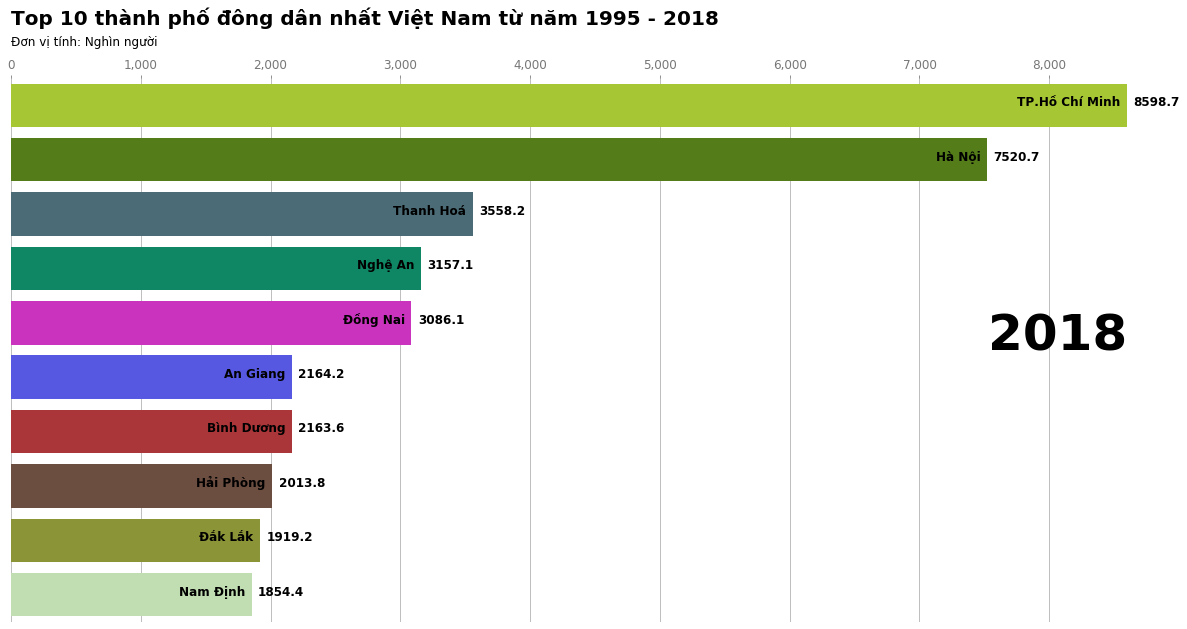

In [109]:
# lấy top (10) địa phương đông dân số nhất để vẽ biểu đồ
TOP = 10

# tạo một list màu ngẫu nhiên
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(TOP)]

fig, ax = plt.subplots(figsize=(20, 10))

# ham vie bieu do bar char
def make_plot(year):
    year = str(year)
    data = df[year].sort_values().tail(TOP)
    ax.clear()
    ax.barh(data.index, data, color=color)
    
    dx = 50
    for i in range(len(data)):
        ax.text(data[i] - dx, i, data.index[i], ha='right', weight=600, size=12)
        ax.text(data[i] + dx, i, data[i], ha='left', weight=600, size=12)
    
    ax.text(1, 0.5, year, transform=ax.transAxes, size=50, weight=1000, ha='right')
    ax.text(0, 1.1, 'Top 10 thành phố đông dân nhất Việt Nam từ năm 1995 - 2018', 
            size=20, weight=600, transform=ax.transAxes, ha='left')
    ax.text(0, 1.06, 'Đơn vị tính: Nghìn người', transform=ax.transAxes, size=12, weight=300)
    
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.margins(0, 0.01)
    ax.set_axisbelow(True)
    ax.set_yticks([])
    plt.box(False)
make_plot(2018)

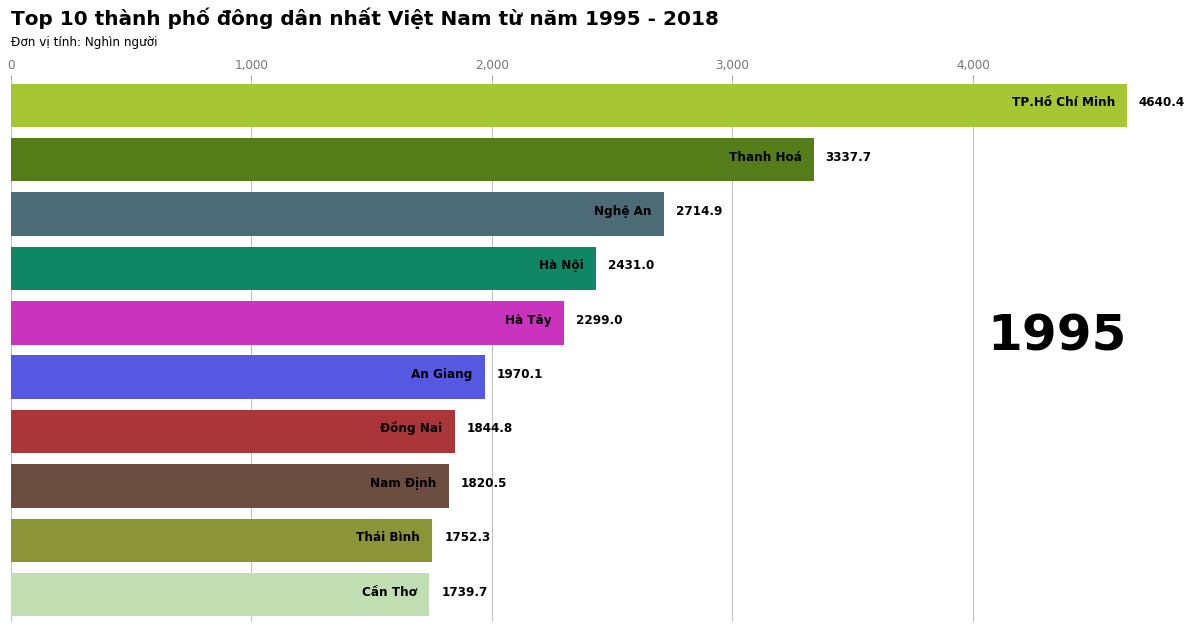

In [110]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(20, 10))
animator = animation.FuncAnimation(fig, make_plot, frames=range(1995, 2019))
HTML(animator.to_jshtml())